In [71]:
import pandas as pd

In [72]:
data = pd.read_csv('../알츠하이머/data/FS_raw.csv')
data

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,(Vol)MTC-l,(Vol)MTC-r,(Vol)CN-l,(Vol)CN-r,(Vol)PUT-l,(Vol)PUT-r,(Vol)THA-l,(Vol)THA-r,(Vol)CBL-l,(Vol)CBL-r
0,6428732,BAPL1,1,70,70.0,7,1,0,E3/E3,1,...,3271,3147,1846,1749,2627,2331,4197,4137,29303,29077
1,6683990,BAPL1,1,71,66.0,11,1,4,E3/E3,1,...,3323,3637,2711,2687,2703,2481,4245,4176,32099,33154
2,24771520,BAPL1,1,70,69.0,16,1,3,E3/E3,1,...,3957,4147,1936,1750,2623,2805,4261,4177,32098,31586
3,1618424,BAPL1,1,74,73.0,4,1,5,E3/E3,1,...,2778,3041,1974,2081,2226,2634,4084,3832,31394,29138
4,2017376,BAPL1,1,78,NaN,12,1,0,E3/E3,1,...,2959,3107,2285,2275,2779,2895,4033,3850,33657,35827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,24225532,BAPL3,0,66,63.0,3,1,5,E3/E4,1,...,2529,3113,2131,2221,2587,3331,4424,4431,29659,28388
164,25220520,BAPL3,0,67,65.0,6,1,5,E4/E4,1,...,2461,2642,1881,1961,2825,2867,4544,4182,35692,34591
165,25468632,BAPL3,0,70,69.0,18,1,5,E3/E4,1,...,3500,4005,2131,2478,2854,2816,4071,4279,33120,34760
166,27419040,BAPL3,0,64,64.0,11,1,5,E3/E4,1,...,2490,2366,2435,2900,2995,2823,4755,4388,32309,34639


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               168 non-null    int64  
 1   positivity       168 non-null    object 
 2   Sex              168 non-null    int64  
 3   Age              168 non-null    int64  
 4   Onset age        148 non-null    float64
 5   Eduction         168 non-null    int64  
 6   PET ligand type  168 non-null    int64  
 7   Diagnosis code   168 non-null    int64  
 8   APOE             168 non-null    object 
 9   SNSB             168 non-null    int64  
 10  MMSE             168 non-null    int64  
 11  CDR              168 non-null    float64
 12  CDR-SOB          168 non-null    float64
 13  GDS              168 non-null    int64  
 14  SGDepS           168 non-null    int64  
 15  (SUV)FC-l        168 non-null    float64
 16  (SUV)FC-r        168 non-null    float64
 17  (SUV)LTC-l      

In [74]:
data.positivity.unique()

array(['BAPL1', 'BAPL2', 'BAPL3'], dtype=object)

In [75]:
posi = ['BAPL2','BAPL3']

data['positivity'] = data.positivity.apply(lambda x:1 if x in posi else 0)
data.positivity.unique()

array([0, 1], dtype=int64)

In [76]:
data['APOE'] = data.APOE.astype('category').cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               168 non-null    int64  
 1   positivity       168 non-null    int64  
 2   Sex              168 non-null    int64  
 3   Age              168 non-null    int64  
 4   Onset age        148 non-null    float64
 5   Eduction         168 non-null    int64  
 6   PET ligand type  168 non-null    int64  
 7   Diagnosis code   168 non-null    int64  
 8   APOE             168 non-null    int8   
 9   SNSB             168 non-null    int64  
 10  MMSE             168 non-null    int64  
 11  CDR              168 non-null    float64
 12  CDR-SOB          168 non-null    float64
 13  GDS              168 non-null    int64  
 14  SGDepS           168 non-null    int64  
 15  (SUV)FC-l        168 non-null    float64
 16  (SUV)FC-r        168 non-null    float64
 17  (SUV)LTC-l      

In [77]:
data.corr()

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,(Vol)MTC-l,(Vol)MTC-r,(Vol)CN-l,(Vol)CN-r,(Vol)PUT-l,(Vol)PUT-r,(Vol)THA-l,(Vol)THA-r,(Vol)CBL-l,(Vol)CBL-r
ID,1.000000,0.018108,-0.149830,-0.031121,-0.001462,0.052622,NaN,0.055674,-0.038595,0.011555,...,-0.037143,-0.003149,-0.110261,-0.092287,-0.060121,-0.030903,-0.069838,-0.105895,0.005629,0.023387
positivity,0.018108,1.000000,-0.017150,0.216661,0.160101,0.130179,NaN,0.409148,0.354743,-0.063811,...,-0.382359,-0.407433,-0.074717,-0.032888,-0.155503,-0.124157,-0.220270,-0.191374,-0.037242,-0.077832
Sex,-0.149830,-0.017150,1.000000,-0.127182,-0.122503,-0.367601,NaN,-0.204324,-0.119926,0.109435,...,-0.080329,-0.040970,-0.195045,-0.199373,-0.229080,-0.147496,-0.236243,-0.225612,-0.369549,-0.406345
Age,-0.031121,0.216661,-0.127182,1.000000,0.946163,0.023308,NaN,0.039415,-0.044605,0.174750,...,-0.267205,-0.254890,0.211273,0.158757,-0.034460,-0.050055,-0.261809,-0.283078,-0.203953,-0.153098
Onset age,-0.001462,0.160101,-0.122503,0.946163,1.000000,0.033661,NaN,-0.008688,-0.078734,0.229010,...,-0.200266,-0.216358,0.217138,0.151892,0.002817,-0.047260,-0.254104,-0.292770,-0.155897,-0.128521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(Vol)PUT-r,-0.030903,-0.124157,-0.147496,-0.050055,-0.047260,0.100405,NaN,-0.166669,-0.113361,-0.087097,...,0.303816,0.405798,0.543733,0.545349,0.851315,1.000000,0.401011,0.487339,0.220414,0.188106
(Vol)THA-l,-0.069838,-0.220270,-0.236243,-0.261809,-0.254104,0.184488,NaN,-0.169806,-0.091554,-0.078681,...,0.450761,0.412178,0.369621,0.333467,0.444251,0.401011,1.000000,0.856099,0.370139,0.399469
(Vol)THA-r,-0.105895,-0.191374,-0.225612,-0.283078,-0.292770,0.187470,NaN,-0.130632,-0.082690,-0.049469,...,0.442794,0.480204,0.363194,0.335522,0.482553,0.487339,0.856099,1.000000,0.385890,0.415829
(Vol)CBL-l,0.005629,-0.037242,-0.369549,-0.203953,-0.155897,0.258248,NaN,0.007633,0.091733,-0.123940,...,0.344263,0.348646,0.201401,0.197766,0.269569,0.220414,0.370139,0.385890,1.000000,0.882513


In [78]:
data['PET ligand type'].unique()

array([1], dtype=int64)

In [79]:
df = data.copy()
df.drop(columns='PET ligand type', inplace=True)
corr = df.corr()
corr1 = corr.iloc[6].sort_values(ascending=False)
corr1.tail(30)

Age           0.039415
(Vol)GCP-r    0.020688
(Vol)CBL-l    0.007633
Onset age    -0.008688
(Vol)GCA-r   -0.020246
(Vol)GCP-l   -0.021651
(Vol)CBL-r   -0.029384
(Vol)CN-r    -0.044159
(Vol)OC-l    -0.056094
(Vol)OC-r    -0.056094
(Vol)CN-l    -0.059769
(Vol)FC-r    -0.066549
(Vol)GCA-l   -0.069022
SNSB         -0.075599
(Vol)FC-l    -0.079571
(SUV)CBL-r   -0.110213
(Vol)THA-r   -0.130632
(Vol)LTC-r   -0.136512
(Vol)PC-r    -0.160871
(Vol)PUT-l   -0.161268
(Vol)PUT-r   -0.166669
(Vol)THA-l   -0.169806
(Vol)LTC-l   -0.189129
Sex          -0.204324
(Vol)PQ-r    -0.205152
(Vol)PQ-l    -0.212384
(Vol)PC-l    -0.261593
(Vol)MTC-l   -0.358570
(Vol)MTC-r   -0.383246
MMSE         -0.639955
Name: Diagnosis code, dtype: float64

In [80]:
df = df.iloc[:,:38]
corr = df.corr()
corr = corr.iloc[6].sort_values(ascending=False)
corr

Diagnosis code    1.000000
GDS               0.795828
CDR-SOB           0.667014
(SUV)PUT-l        0.459694
(SUV)PUT-r        0.445789
(SUV)GCA-l        0.442903
(SUV)GCA-r        0.440731
(SUV)GCP-l        0.439247
(SUV)GCP-r        0.429696
(SUV)PQ-r         0.427482
(SUV)PQ-l         0.415662
(SUV)FC-r         0.414658
(SUV)LTC-r        0.410479
positivity        0.409148
CDR               0.405876
(SUV)FC-l         0.402696
(SUV)CN-r         0.396309
(SUV)PC-r         0.394875
(SUV)LTC-l        0.394690
(SUV)CN-l         0.384433
(SUV)PC-l         0.376564
(SUV)OC-l         0.372480
(SUV)OC-r         0.372480
APOE              0.250919
(SUV)THA-l        0.232711
(SUV)THA-r        0.228025
SGDepS            0.116523
(SUV)CBL-l        0.108709
Eduction          0.102318
(SUV)MTC-l        0.073680
ID                0.055674
(SUV)MTC-r        0.052372
Age               0.039415
Onset age        -0.008688
SNSB             -0.075599
(SUV)CBL-r       -0.110213
Sex              -0.204324
M

In [81]:
abs_corr = abs(corr).sort_values(ascending=False)
cor = pd.DataFrame(abs_corr.iloc[1:])
cor.reset_index(inplace=True)

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

Text(0.5, 0, 'feature')

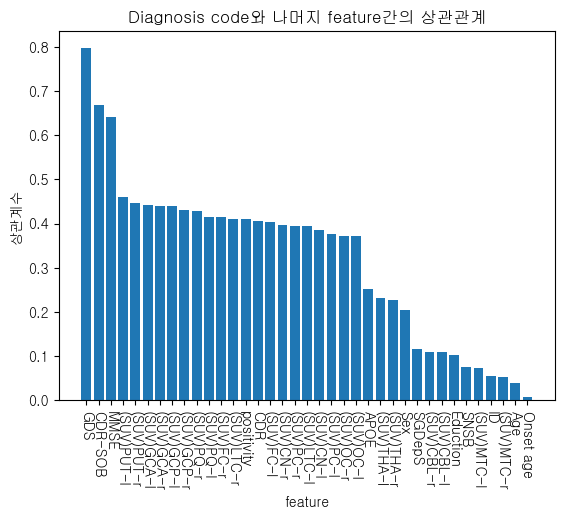

In [83]:
plt.bar(cor['index'], cor['Diagnosis code'])
plt.xticks(cor['index'], rotation=-90)
plt.title('Diagnosis code와 나머지 feature간의 상관관계')
plt.ylabel('상관계수')
plt.xlabel('feature')

In [84]:
PET = data.iloc[:,15:]
PET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (SUV)FC-l   168 non-null    float64
 1   (SUV)FC-r   168 non-null    float64
 2   (SUV)LTC-l  168 non-null    float64
 3   (SUV)LTC-r  168 non-null    float64
 4   (SUV)PC-l   168 non-null    float64
 5   (SUV)PC-r   168 non-null    float64
 6   (SUV)OC-l   168 non-null    float64
 7   (SUV)OC-r   168 non-null    float64
 8   (SUV)GCA-l  168 non-null    float64
 9   (SUV)GCA-r  168 non-null    float64
 10  (SUV)GCP-l  168 non-null    float64
 11  (SUV)GCP-r  168 non-null    float64
 12  (SUV)PQ-l   168 non-null    float64
 13  (SUV)PQ-r   168 non-null    float64
 14  (SUV)MTC-l  168 non-null    float64
 15  (SUV)MTC-r  168 non-null    float64
 16  (SUV)CN-l   168 non-null    float64
 17  (SUV)CN-r   168 non-null    float64
 18  (SUV)PUT-l  168 non-null    float64
 19  (SUV)PUT-r  168 non-null    f

In [85]:
SUVr_lr = pd.DataFrame()
for i in range(24):
    col = PET.columns[i+24]
    col_new = col[5:]
    SUVr_lr[col_new] = PET.iloc[:,i]*PET.iloc[:,i+24]
    
for i in range(24,48):
    col = PET.columns[i]
    SUVr_lr[col] = PET.iloc[:,i]

In [86]:
SUVr_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FC-l        168 non-null    float64
 1   FC-r        168 non-null    float64
 2   LTC-l       168 non-null    float64
 3   LTC-r       168 non-null    float64
 4   PC-l        168 non-null    float64
 5   PC-r        168 non-null    float64
 6   OC-l        168 non-null    float64
 7   OC-r        168 non-null    float64
 8   GCA-l       168 non-null    float64
 9   GCA-r       168 non-null    float64
 10  GCP-l       168 non-null    float64
 11  GCP-r       168 non-null    float64
 12  PQ-l        168 non-null    float64
 13  PQ-r        168 non-null    float64
 14  MTC-l       168 non-null    float64
 15  MTC-r       168 non-null    float64
 16  CN-l        168 non-null    float64
 17  CN-r        168 non-null    float64
 18  PUT-l       168 non-null    float64
 19  PUT-r       168 non-null    f

In [87]:
SUVr = pd.DataFrame()
for i in range(12):
    col = SUVr_lr.columns[2*i]
    col = col[:-2]
    SUVr[col] = (SUVr_lr.iloc[:,2*i]+SUVr_lr.iloc[:,2*i+1])/(SUVr_lr.iloc[:,2*i+24]+SUVr_lr.iloc[:,2*i+25])
SUVr = round(SUVr, 3)
SUVr.reset_index(inplace=True)

In [88]:
except_pet = data.iloc[:,:15].reset_index()
FS_clean = pd.merge(except_pet, SUVr, how='inner', on=None)
FS_clean = FS_clean.drop(['index'], axis=1)
FS_clean

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,PC,OC,GCA,GCP,PQ,MTC,CN,PUT,THA,CBL
0,6428732,0,1,70,70.0,7,1,0,2,1,...,1.141,1.152,1.144,1.145,1.158,1.208,1.104,1.421,1.367,1.0
1,6683990,0,1,71,66.0,11,1,4,2,1,...,1.199,1.215,1.131,1.192,1.160,1.075,1.003,1.471,1.236,1.0
2,24771520,0,1,70,69.0,16,1,3,2,1,...,1.161,1.250,1.162,1.176,1.139,1.181,1.083,1.466,1.284,1.0
3,1618424,0,1,74,73.0,4,1,5,2,1,...,1.174,1.137,1.119,1.284,1.205,1.129,1.062,1.484,1.490,1.0
4,2017376,0,1,78,NaN,12,1,0,2,1,...,1.117,1.134,1.019,1.119,1.098,1.058,1.062,1.400,1.362,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,24225532,1,0,66,63.0,3,1,5,3,1,...,1.775,1.582,1.829,2.097,2.153,1.233,1.601,1.933,1.650,1.0
164,25220520,1,0,67,65.0,6,1,5,4,1,...,1.773,1.578,1.856,1.960,1.903,1.306,1.717,2.073,1.784,1.0
165,25468632,1,0,70,69.0,18,1,5,3,1,...,1.841,1.730,1.856,2.090,2.165,1.259,1.691,1.932,1.611,1.0
166,27419040,1,0,64,64.0,11,1,5,3,1,...,1.603,1.507,1.790,1.864,1.816,1.140,1.409,1.809,1.573,1.0


In [89]:
FS_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               168 non-null    int64  
 1   positivity       168 non-null    int64  
 2   Sex              168 non-null    int64  
 3   Age              168 non-null    int64  
 4   Onset age        148 non-null    float64
 5   Eduction         168 non-null    int64  
 6   PET ligand type  168 non-null    int64  
 7   Diagnosis code   168 non-null    int64  
 8   APOE             168 non-null    int8   
 9   SNSB             168 non-null    int64  
 10  MMSE             168 non-null    int64  
 11  CDR              168 non-null    float64
 12  CDR-SOB          168 non-null    float64
 13  GDS              168 non-null    int64  
 14  SGDepS           168 non-null    int64  
 15  FC               168 non-null    float64
 16  LTC              168 non-null    float64
 17  PC              

In [94]:
clean = FS_clean.drop(['PET ligand type','CBL'], axis=1)
clean.corr().iloc[6].sort_values(ascending=False)

Diagnosis code    1.000000
GDS               0.795828
CDR-SOB           0.667014
PUT               0.455311
GCA               0.445634
GCP               0.437264
PQ                0.424046
FC                0.410616
positivity        0.409148
CDR               0.405876
LTC               0.405444
CN                0.402361
PC                0.388937
OC                0.372480
APOE              0.250919
THA               0.235953
SGDepS            0.116523
Eduction          0.102318
MTC               0.065516
ID                0.055674
Age               0.039415
Onset age        -0.008688
SNSB             -0.075599
Sex              -0.204324
MMSE             -0.639955
Name: Diagnosis code, dtype: float64

In [131]:
df2 = FS_clean.copy()

In [132]:
data2 = pd.read_csv('../알츠하이머/data/FS_raw.csv')
print(data2.APOE.unique())
print(df.APOE.unique())

['E3/E3' 'E3/E4' 'E2/E3' 'E4/E4' 'E2/E4']
[2 3 0 4 1]


In [133]:
df2

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,PC,OC,GCA,GCP,PQ,MTC,CN,PUT,THA,CBL
0,6428732,0,1,70,70.0,7,1,0,2,1,...,1.141,1.152,1.144,1.145,1.158,1.208,1.104,1.421,1.367,1.0
1,6683990,0,1,71,66.0,11,1,4,2,1,...,1.199,1.215,1.131,1.192,1.160,1.075,1.003,1.471,1.236,1.0
2,24771520,0,1,70,69.0,16,1,3,2,1,...,1.161,1.250,1.162,1.176,1.139,1.181,1.083,1.466,1.284,1.0
3,1618424,0,1,74,73.0,4,1,5,2,1,...,1.174,1.137,1.119,1.284,1.205,1.129,1.062,1.484,1.490,1.0
4,2017376,0,1,78,NaN,12,1,0,2,1,...,1.117,1.134,1.019,1.119,1.098,1.058,1.062,1.400,1.362,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,24225532,1,0,66,63.0,3,1,5,3,1,...,1.775,1.582,1.829,2.097,2.153,1.233,1.601,1.933,1.650,1.0
164,25220520,1,0,67,65.0,6,1,5,4,1,...,1.773,1.578,1.856,1.960,1.903,1.306,1.717,2.073,1.784,1.0
165,25468632,1,0,70,69.0,18,1,5,3,1,...,1.841,1.730,1.856,2.090,2.165,1.259,1.691,1.932,1.611,1.0
166,27419040,1,0,64,64.0,11,1,5,3,1,...,1.603,1.507,1.790,1.864,1.816,1.140,1.409,1.809,1.573,1.0


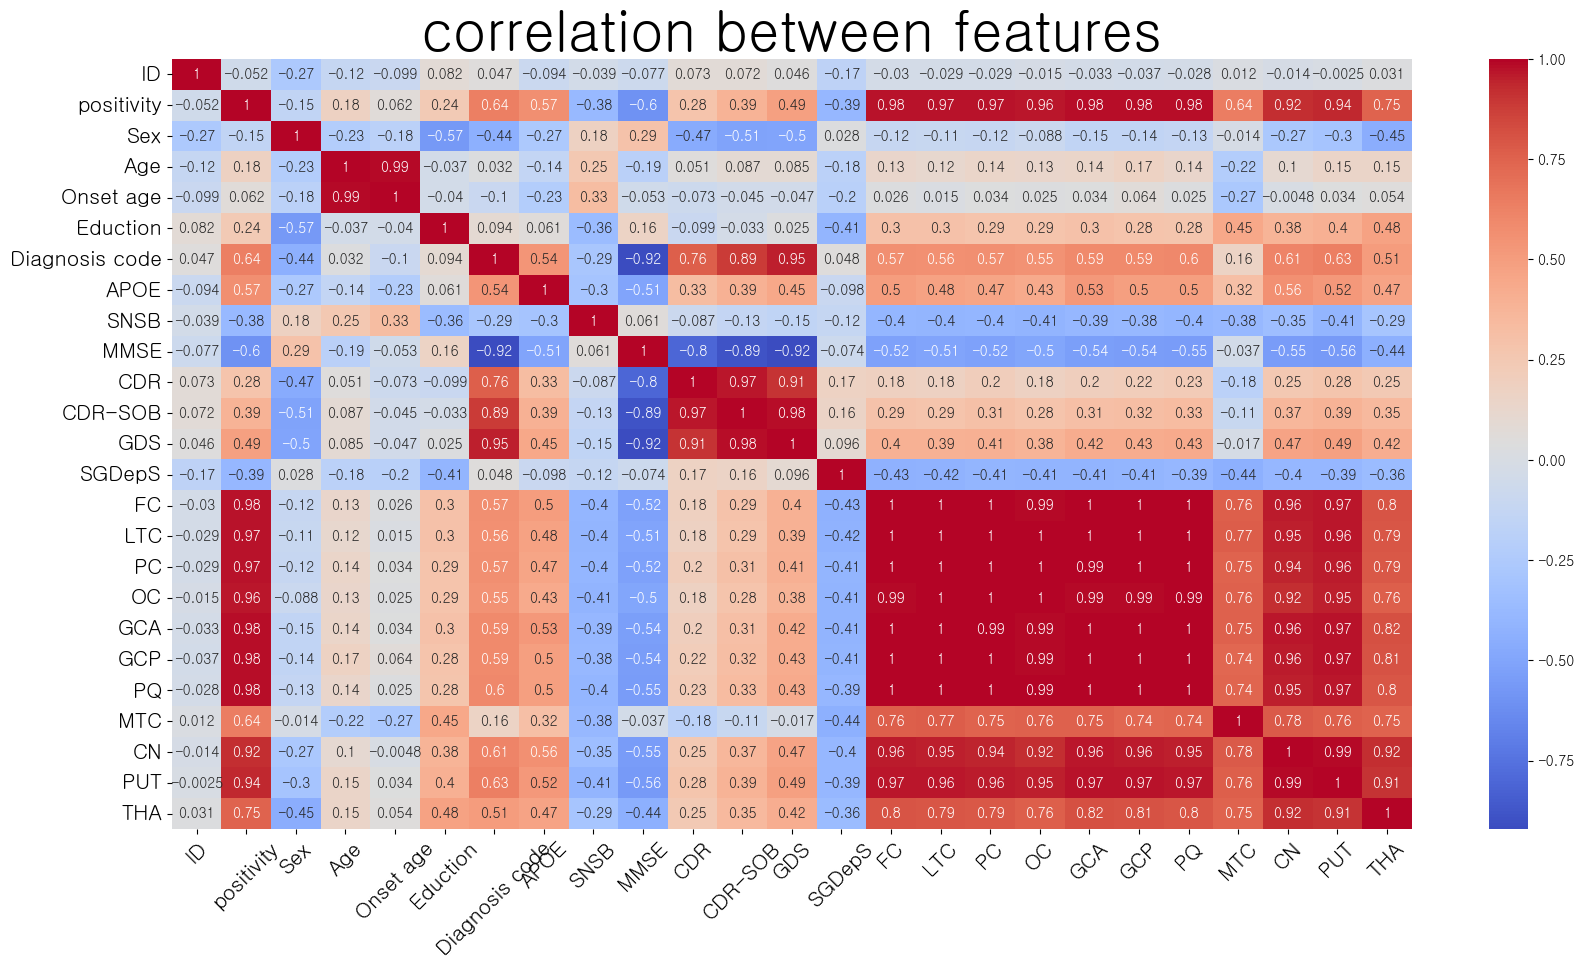

In [134]:
df2.drop(columns='PET ligand type', inplace=True)
corr = clean.corr()

plt.figure(figsize=(20,10))

heat_table = corr.corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

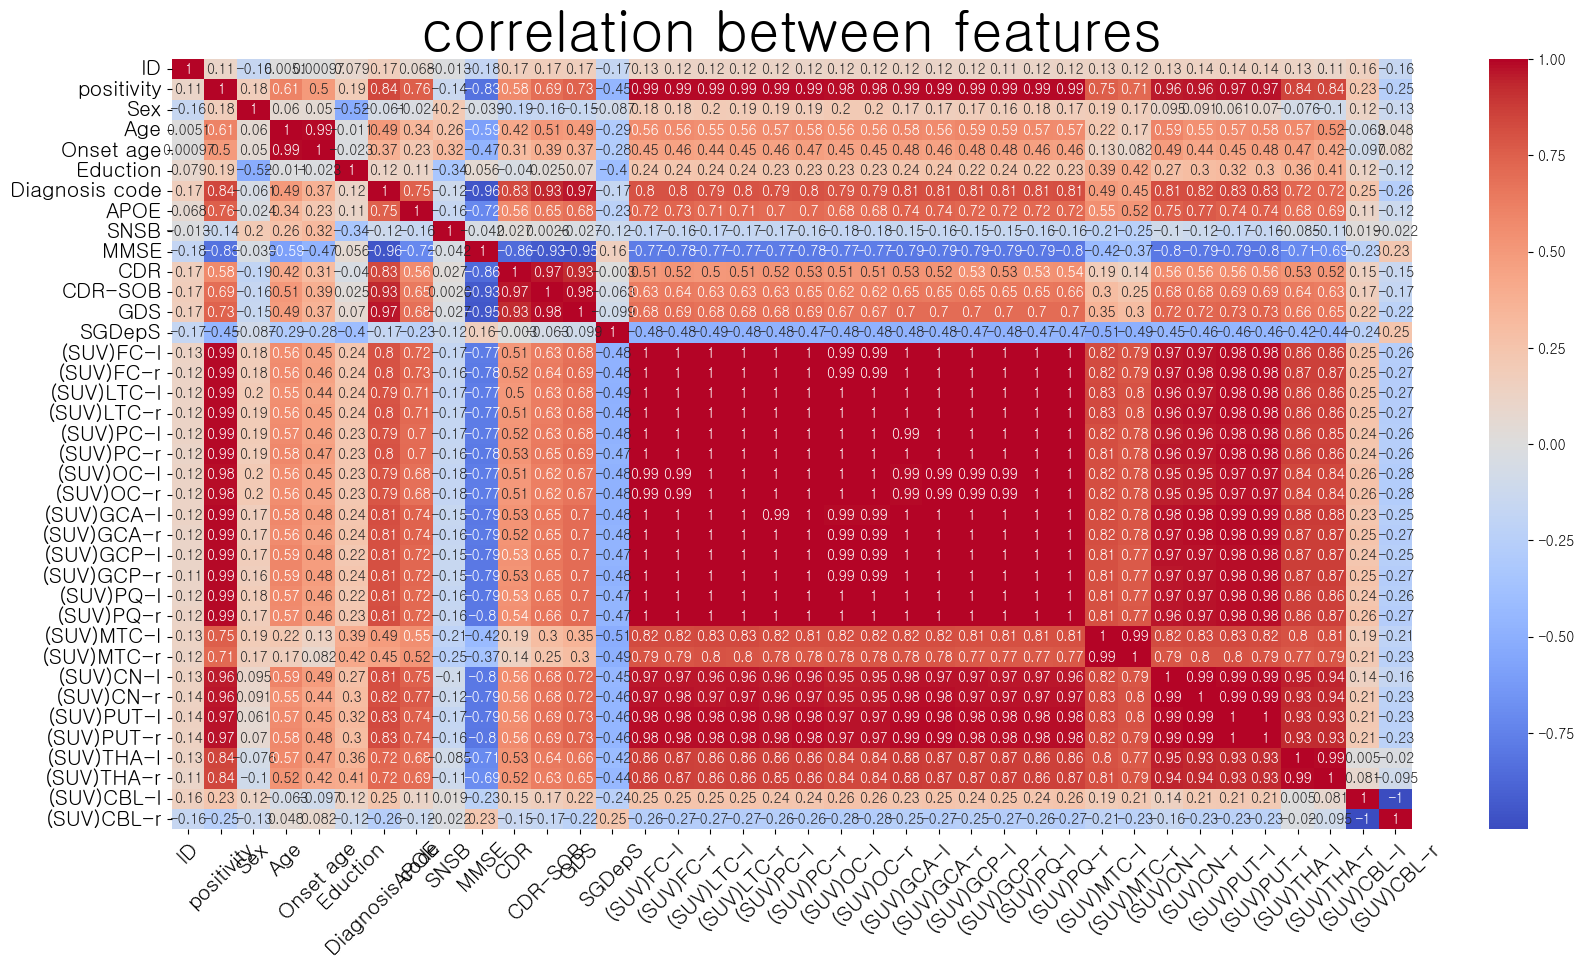

In [126]:
import seaborn as sns
df = data.copy()
df.drop(columns='PET ligand type', inplace=True)
corr = df.corr().iloc[:,:38]

plt.figure(figsize=(20,10))

heat_table = corr.corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [129]:
df.columns

Index(['ID', 'positivity', 'Sex', 'Age', 'Onset age', 'Eduction',
       'Diagnosis code', 'APOE', 'SNSB', 'MMSE', 'CDR', 'CDR-SOB', 'GDS',
       'SGDepS', '(SUV)FC-l', '(SUV)FC-r', '(SUV)LTC-l', '(SUV)LTC-r',
       '(SUV)PC-l', '(SUV)PC-r', '(SUV)OC-l', '(SUV)OC-r', '(SUV)GCA-l',
       '(SUV)GCA-r', '(SUV)GCP-l', '(SUV)GCP-r', '(SUV)PQ-l', '(SUV)PQ-r',
       '(SUV)MTC-l', '(SUV)MTC-r', '(SUV)CN-l', '(SUV)CN-r', '(SUV)PUT-l',
       '(SUV)PUT-r', '(SUV)THA-l', '(SUV)THA-r', '(SUV)CBL-l', '(SUV)CBL-r',
       '(Vol)FC-l', '(Vol)FC-r', '(Vol)LTC-l', '(Vol)LTC-r', '(Vol)PC-l',
       '(Vol)PC-r', '(Vol)OC-l', '(Vol)OC-r', '(Vol)GCA-l', '(Vol)GCA-r',
       '(Vol)GCP-l', '(Vol)GCP-r', '(Vol)PQ-l', '(Vol)PQ-r', '(Vol)MTC-l',
       '(Vol)MTC-r', '(Vol)CN-l', '(Vol)CN-r', '(Vol)PUT-l', '(Vol)PUT-r',
       '(Vol)THA-l', '(Vol)THA-r', '(Vol)CBL-l', '(Vol)CBL-r'],
      dtype='object')